In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
import sklearn
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df = pd.read_csv("IMDB Dataset.csv")
print("Shape of the DataFrame:",df.shape)

Shape of the DataFrame: (50000, 2)


In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: xlabel='count', ylabel='sentiment'>

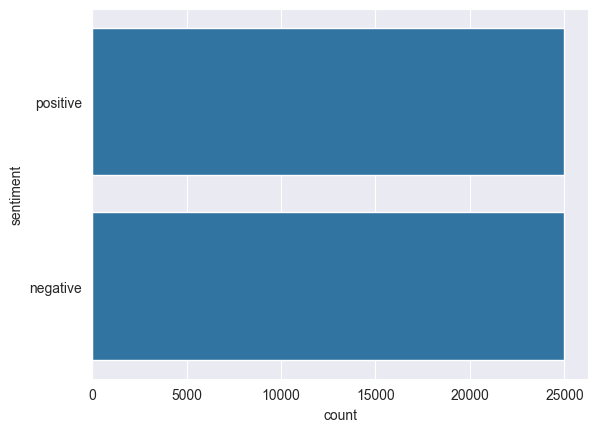

In [8]:
#check for the various target labels in our dataset using seaborn.
sns.countplot(df.sentiment)

In [9]:
#we will create a custom encoder to convert categorical target labels to numerical form.
df.replace({'positive': 0, 'negative': 1},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5864\2786726049.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'positive': 0, 'negative': 1},inplace=True)


In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [11]:
# Lowercasing
df['review'] = df['review'].str.lower()

# Tokenization
df['review'] = df['review'].apply(word_tokenize)

# Removing Punctuation
df['review'] = df['review'].apply(lambda x: [word for word in x if word.isalnum()])

# Removing Stopwords
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join tokens back into sentences
df['review'] = df['review'].apply(' '.join)

print(df)

                                                  review  sentiment
0      one reviewer mentioned watching 1 oz episode h...          0
1      wonderful little production br br filming tech...          0
2      thought wonderful way spend time hot summer we...          0
3      basically family little boy jake think zombie ...          1
4      petter mattei love time money visually stunnin...          0
...                                                  ...        ...
49995  thought movie right good job creative original...          0
49996  bad plot bad dialogue bad acting idiotic direc...          1
49997  catholic taught parochial elementary school nu...          1
49998  going disagree previous comment side maltin on...          1
49999  one expects star trek movie high art fan expec...          1

[50000 rows x 2 columns]


In [22]:
# Check data type and for null values
print("Data type of df['review']: ", type(df['review']))
print("Number of null values in df['review']: ", df['review'].isnull().sum())

Data type of df['review']:  <class 'pandas.core.series.Series'>
Number of null values in df['review']:  0


In [24]:
#e will convert the text data into vectors, by fitting and transforming the corpus that we have created.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
x = tfidf_vect.fit_transform(df['review'])
y = df.sentiment

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

accuracy_scor = accuracy_score(y_test, lr_pred)
precision_scor = precision_score(y_test, lr_pred, average='weighted')
recall_scor = recall_score(y_test, lr_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, lr_pred)

print("Accuracy:", accuracy_scor)
print("Precision:", precision_scor)
print("Recall:", recall_scor)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8933
Precision: 0.8935728080040293
Recall: 0.8933
Confusion Matrix:
 [[4574  465]
 [ 602 4359]]


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

accuracy_scor_dt = accuracy_score(y_test, dt_pred)
precision_scor_dt = precision_score(y_test, dt_pred, average='weighted')
recall_scor_dt = recall_score(y_test, dt_pred, average='weighted')
confusion_mat_dt = confusion_matrix(y_test, dt_pred)

print("Accuracy:", accuracy_scor_dt)
print("Precision:", precision_scor_dt)
print("Recall:", recall_scor_dt)
print("Confusion Matrix:\n", confusion_mat_dt)

Accuracy: 0.717
Precision: 0.7171398204296526
Recall: 0.717
Confusion Matrix:
 [[3572 1467]
 [1363 3598]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

accuracy_scor_rf = accuracy_score(y_test, rf_pred)
precision_scor_rf = precision_score(y_test, rf_pred, average='weighted')
recall_scor_rf = recall_score(y_test, rf_pred, average='weighted')
confusion_mat_rf = confusion_matrix(y_test, rf_pred)

print("Accuracy:", accuracy_scor_rf)
print("Precision:", precision_scor_rf)
print("Recall:", recall_scor_rf)
print("Confusion Matrix:\n", confusion_mat_rf)

Accuracy: 0.8565
Precision: 0.8566691782048318
Recall: 0.8565
Confusion Matrix:
 [[4380  659]
 [ 776 4185]]


In [38]:
import pickle
pickle.dump(tfidf_vect,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))